In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\tuf\Downloads\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [6]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

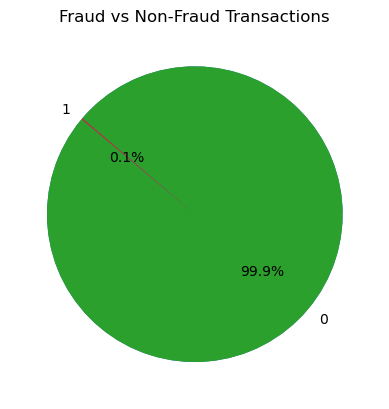

In [84]:
pie = df.isFraud.value_counts()
plt.pie(pie)

plt.pie(pie, labels=pie.index, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Fraud vs Non-Fraud Transactions')

# Display the plot
plt.show()

In [11]:
# Dropping unnecessary columns

df=df.drop(['nameOrig','nameDest'],axis=1)

In [12]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [9]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


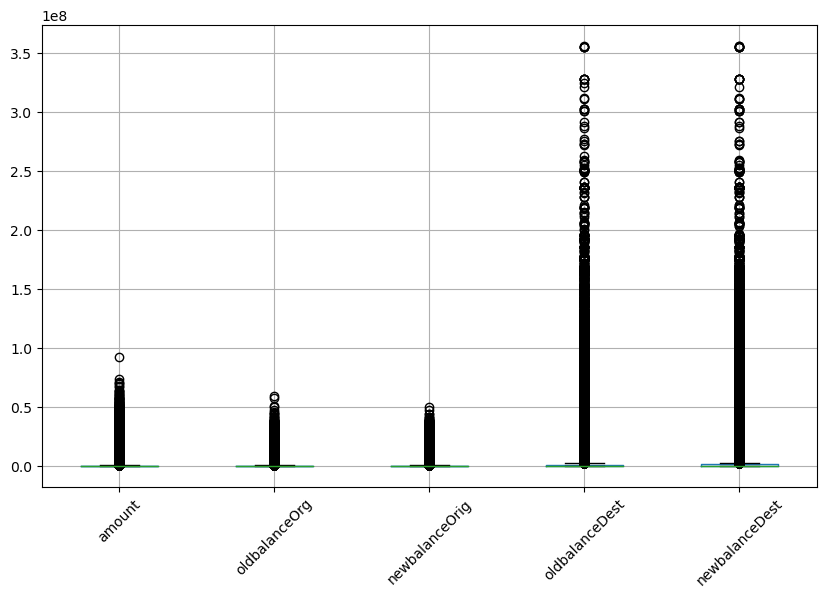

In [11]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[features].boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [13]:
# Column 'type' has categorical values and are non-ordinal so we are using one-hot encoding


df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [15]:
df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1,0,True,False,False,False
6362616,743,6311409.28,6311409.28,0.0,0.00,0.00,1,0,False,False,False,True
6362617,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,850002.52,850002.52,0.0,0.00,0.00,1,0,False,False,False,True
6362619,743,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0,True,False,False,False


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type_CASH_OUT   bool   
 9   type_DEBIT      bool   
 10  type_PAYMENT    bool   
 11  type_TRANSFER   bool   
dtypes: bool(4), float64(5), int64(3)
memory usage: 412.6 MB


## Splitting dataset into training & test

In [14]:
# importing train_test_split

from sklearn.model_selection import train_test_split 

#splitting training and test data

x = df.drop(columns=['isFraud'])
y = df['isFraud']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

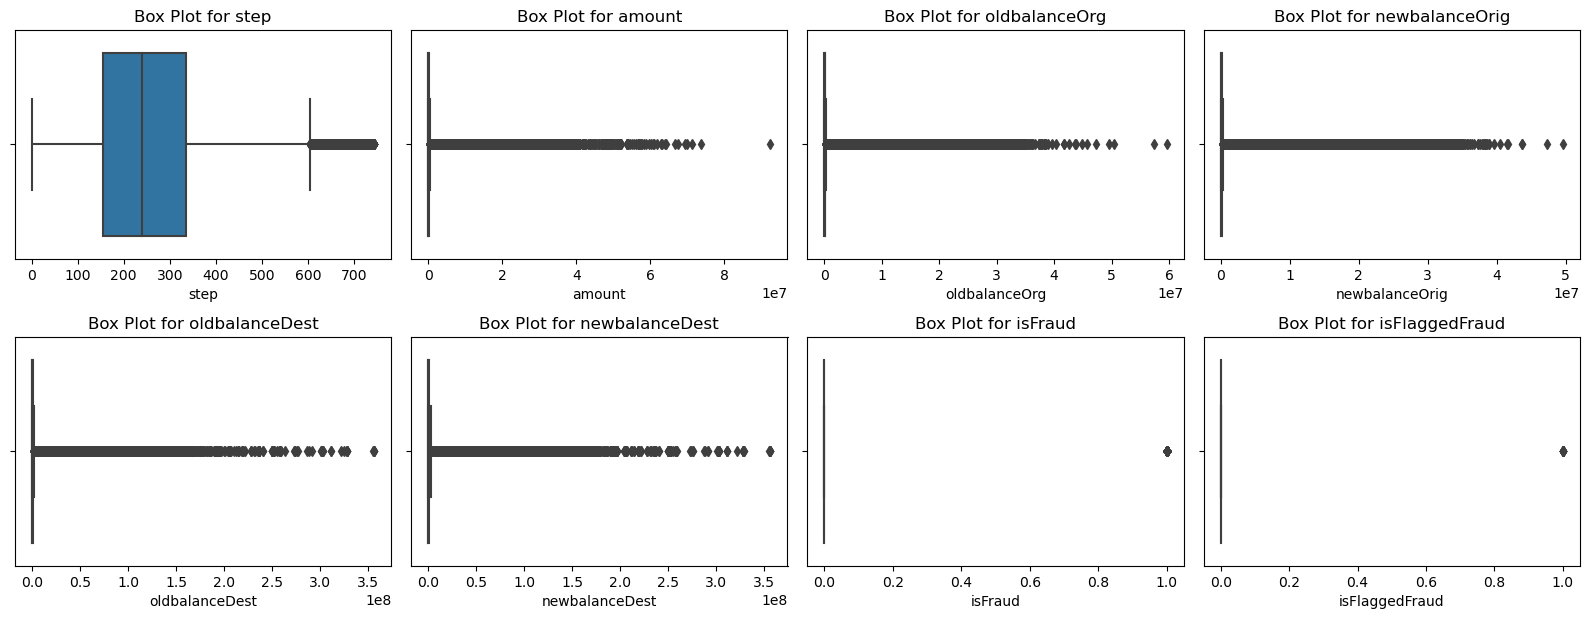

In [52]:
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

# Decision Tree

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import GridSearchCV

In [23]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(x_train,y_train)

#Predict Values 

y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

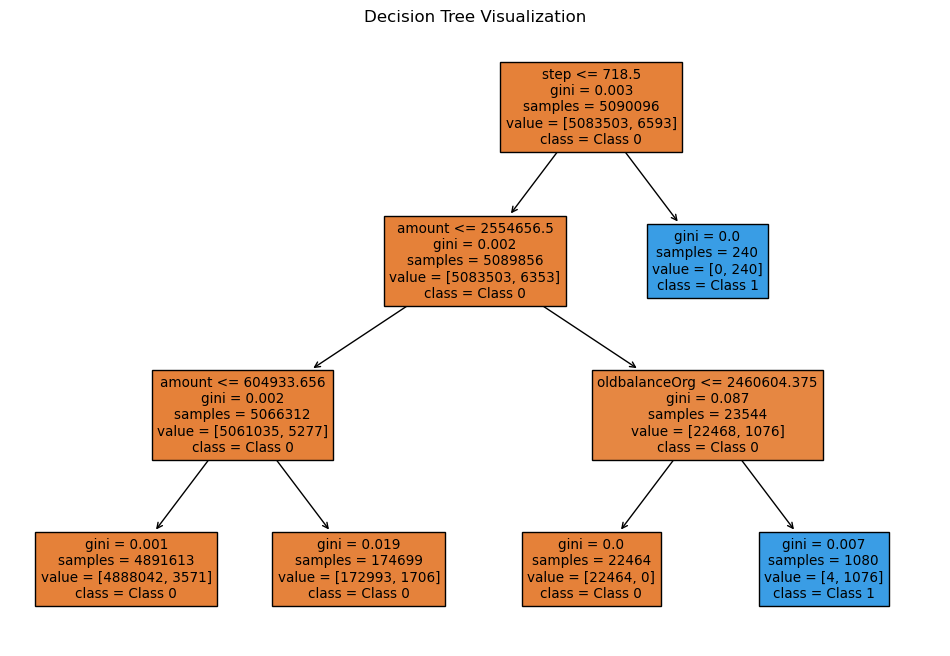

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clftree, filled=True, feature_names=x_train.columns, class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree Visualization")
plt.show()

In [27]:

cfm_train_ct = confusion_matrix(y_train, y_train_pred)
cfm_test_ct = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training Data):")
print(cfm_train_ct)

print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ct)

Confusion Matrix (Training Data):
[[5083499       4]
 [   5277    1316]]

Confusion Matrix (Testing Data):
[[1270902       2]
 [   1320     300]]


In [28]:
acs_train_ct = accuracy_score(y_train, y_train_pred)
acs_test_ct = accuracy_score(y_test, y_test_pred)

print("\nAccuracy Score (Training Data):", acs_train_ct)
print("\nAccuracy Score (Testing Data):", acs_test_ct)


Accuracy Score (Training Data): 0.9989624950099173

Accuracy Score (Testing Data): 0.998961119790275


In [31]:
pcs_train_ct = precision_score(y_train, y_train_pred)
pcs_test_ct = precision_score(y_test, y_test_pred)

print("\nPrecision Score (Test Data):", pcs_test_ct)
print("\nPrecision Score (Train Data): ", pcs_train_ct)


Precision Score (Test Data): 0.9933774834437086

Precision Score (Train Data):  0.996969696969697


##### Accuracy Score (0.9989):

##### The accuracy is very high, suggesting that the model correctly predicts the majority of the training data.

##### Precision Score (0.9969):
##### Precision is also very high, indicating that when the model predicts a positive class, it is almost always correct.

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
# Initialize the logistic regression model
model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model on the training data
model.fit(x_train, y_train)

C:\Users\tuf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [37]:
# Make predictions on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [39]:
# Measuring Accuracy Scores

print("Accuracy on Training Data:", accuracy_score(y_train, y_train_pred))
print("Accuracy on Test Data:", accuracy_score(y_test, y_test_pred))

Accuracy on Training Data: 0.9539156039493165
Accuracy on Test Data: 0.9540165843630454


In [40]:
print("Precision on Trainig Data:", precision_score(y_train, y_train_pred))
print("Precision on Test Data:", precision_score(y_test, y_test_pred))

Precision on Trainig Data: 0.026595899314337448
Precision on Test Data: 0.02624610721601412


In [41]:
print("Recall on test dataset:", recall_score(y_test, y_test_pred))
print("Recall on training dataset:", recall_score(y_train, y_train_pred))

print("ROC AUC on test dataset:", roc_auc_score(y_test, y_test_pred))
print("ROC AUC on training dataset:", roc_auc_score(y_train, y_train_pred))

Recall on test dataset: 0.9728395061728395
Recall on training dataset: 0.9713332322159867
ROC AUC on test dataset: 0.9634160486366737
ROC AUC on training dataset: 0.9626131232704757


In [70]:
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [71]:
import streamlit as st
import numpy as np
import pickle

# Load your trained logistic regression model
model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

# Define a function to make predictions
def predict_fraud(features):
    prediction = model.predict([features])
    return 'Fraud' if prediction == 1 else 'Not Fraud'

# Streamlit UI
st.title("Fraud Detection Model")
st.write("Enter transaction details to predict whether it is fraud or not.")

# Input fields for user to enter feature values
amount = st.number_input('Transaction Amount', min_value=0.0)
oldbalanceOrg = st.number_input('Old Balance of Origin', min_value=0.0)
newbalanceOrig = st.number_input('New Balance of Origin', min_value=0.0)
oldbalanceDest = st.number_input('Old Balance of Destination', min_value=0.0)
newbalanceDest = st.number_input('New Balance of Destination', min_value=0.0)
type_CASH_OUT = st.checkbox('Transaction Type: CASH_OUT')
type_DEBIT = st.checkbox('Transaction Type: DEBIT')
type_PAYMENT = st.checkbox('Transaction Type: PAYMENT')
type_TRANSFER = st.checkbox('Transaction Type: TRANSFER')

# Convert checkbox inputs to numerical values
transaction_types = [type_CASH_OUT, type_DEBIT, type_PAYMENT, type_TRANSFER]
transaction_types = [1 if t else 0 for t in transaction_types]

# When the button is clicked, make the prediction
if st.button('Predict'):
    features = [amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest] + transaction_types
    result = predict_fraud(features)
    st.write(f"The transaction is predicted to be: **{result}**")


2024-08-11 15:15:43.632 
  command:

    streamlit run C:\Users\tuf\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-08-11 15:15:43.634 Session state does not function when running a script without `streamlit run`
